**Human Pose Estimation with Deep Neural Networks  -  Part 1**

In [0]:

# Downloading the train_32x32.mat and test_32x32.mat SVHN datasets
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat



In [9]:

# All the necessary imports
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the .mat file using loadmat method from scipy
train_data = loadmat("train_32x32.mat")

train_data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

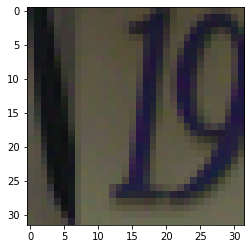

[1]


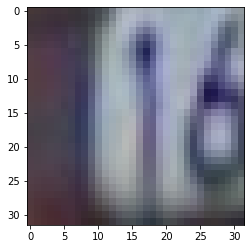

[1]


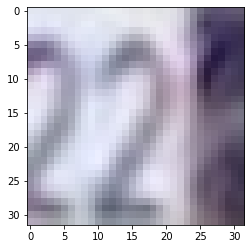

[2]


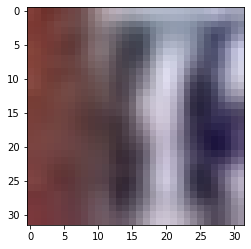

[1]


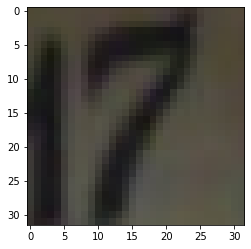

[7]


In [21]:
# access to the dict
X_train = train_data['X']
y_train = train_data['y']

# show sample
index = 0
for i in range(5):
  plt.imshow(X_train[:,:,:,index])
  plt.show()
  print(y_train[index])
  index += 20

In [22]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip']  #, 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Done transferring all datasets
